In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
file_path = "Employees.csv"  
data = pd.read_csv(file_path)
print(data.head())

   Unnamed: 0  id   age  gender  income  days_on_platform           city  \
0           0   0   NaN    Male  126895              14.0  San Francisco   
1           1   1   NaN    Male  161474              14.0          Tokyo   
2           2   2  24.0    Male  104723              34.0         London   
3           3   3  29.0    Male   43791              28.0         London   
4           4   4  18.0  Female  132181              26.0         London   

   purchases  
0          0  
1          0  
2          1  
3          2  
4          2  


In [4]:
missing_values = data.isnull().sum()
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 Unnamed: 0             0
id                     0
age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
data_cleaned = data.drop(columns=["Unnamed: 0", "id"], errors="ignore")

# Handle missing values for 'age' using mean imputation
imputer = SimpleImputer(strategy="mean")
data_cleaned["age"] = imputer.fit_transform(data_cleaned[["age"]])

# Verify that NaN values are replaced
print(data_cleaned["age"].isnull().sum())  # The output is 0 which means no NaN values



0


In [22]:
print(data_cleaned.head())

         age  gender  income  days_on_platform           city  purchases
0  30.202036    Male  126895              14.0  San Francisco          0
1  30.202036    Male  161474              14.0          Tokyo          0
2  24.000000    Male  104723              34.0         London          1
3  29.000000    Male   43791              28.0         London          2
4  18.000000  Female  132181              26.0         London          2


In [24]:
print(data_cleaned.columns)


Index(['age', 'gender', 'income', 'days_on_platform', 'city', 'purchases'], dtype='object')


In [27]:
# Encode categorical variables ('gender', 'city')
label_encoder = LabelEncoder()
data_cleaned["gender"] = label_encoder.fit_transform(data_cleaned["gender"])
data_cleaned["city"] = label_encoder.fit_transform(data_cleaned["city"])
# Define features (X) and target (y)
X = data_cleaned.drop(columns=["purchases"])
y = data_cleaned["purchases"]
# Handle any remaining missing values in X
X = X.fillna(X.mean())



<Figure size 1200x600 with 0 Axes>

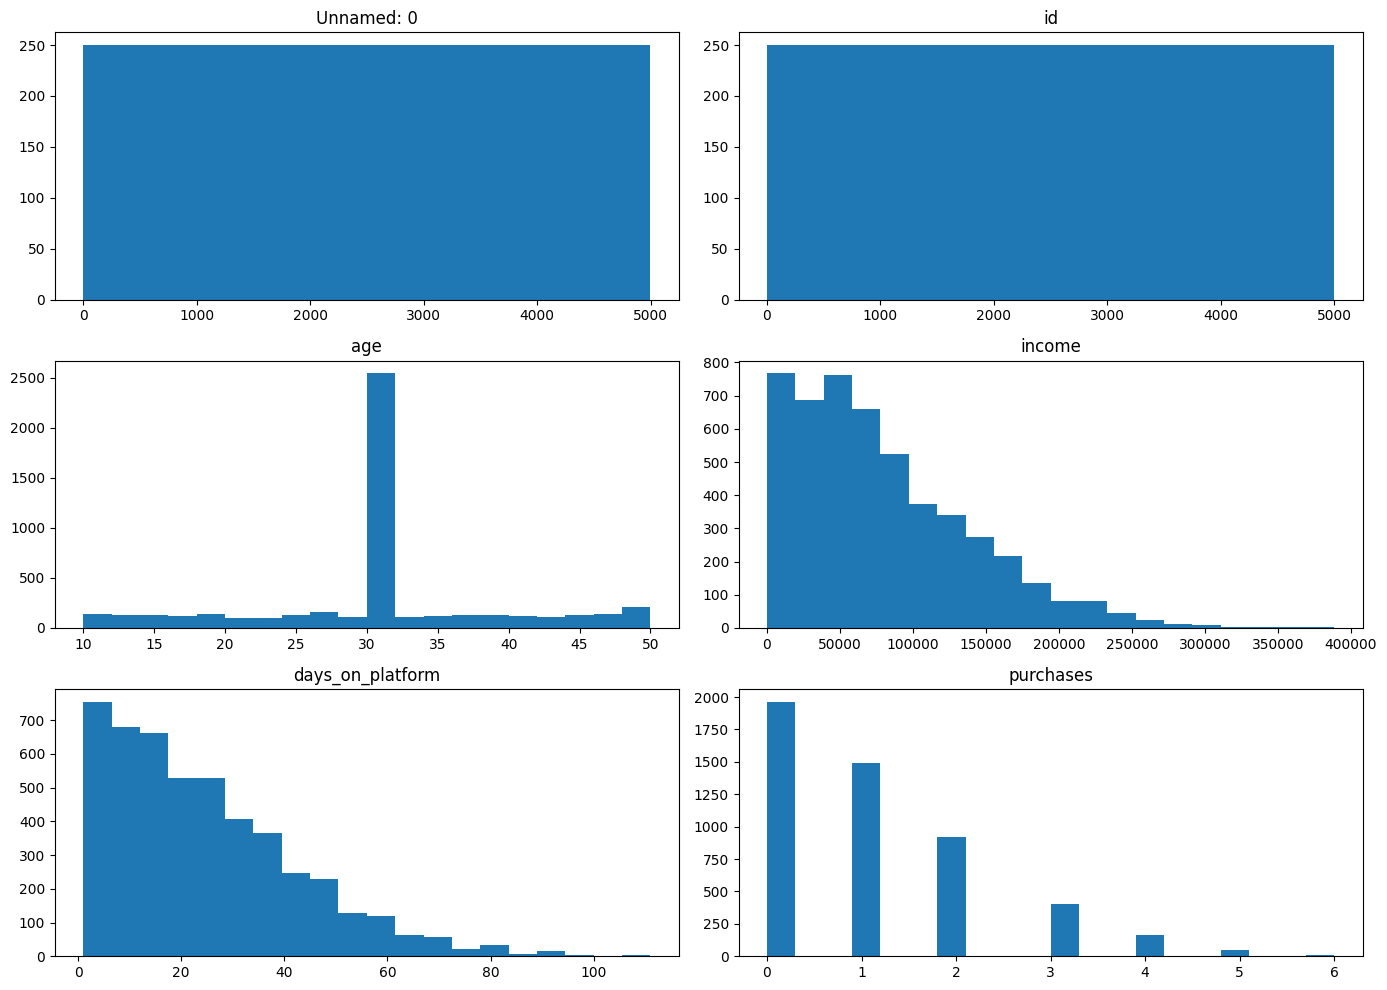

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data.hist(bins=20, figsize=(14, 10), grid=False)
plt.tight_layout()
plt.show()

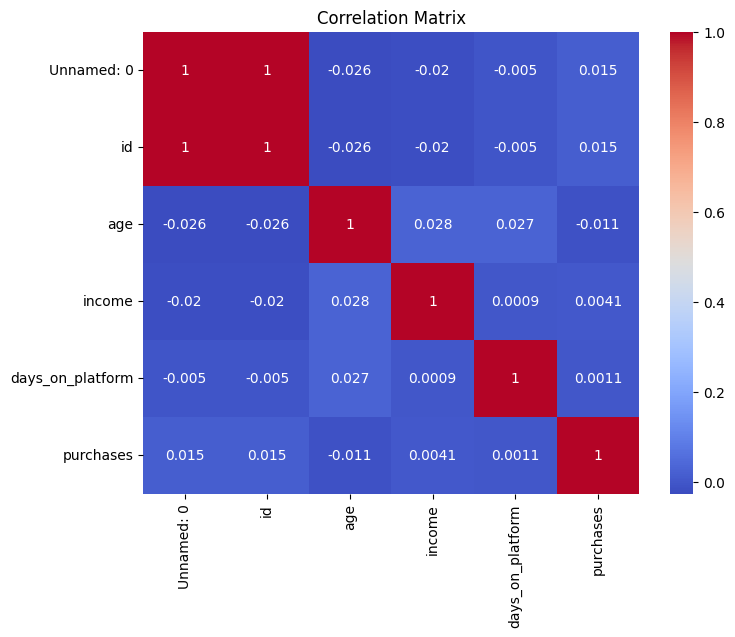

In [8]:
### Kernel 3: Bivariate EDA
import seaborn as sns
plt.figure(figsize=(8, 6))
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

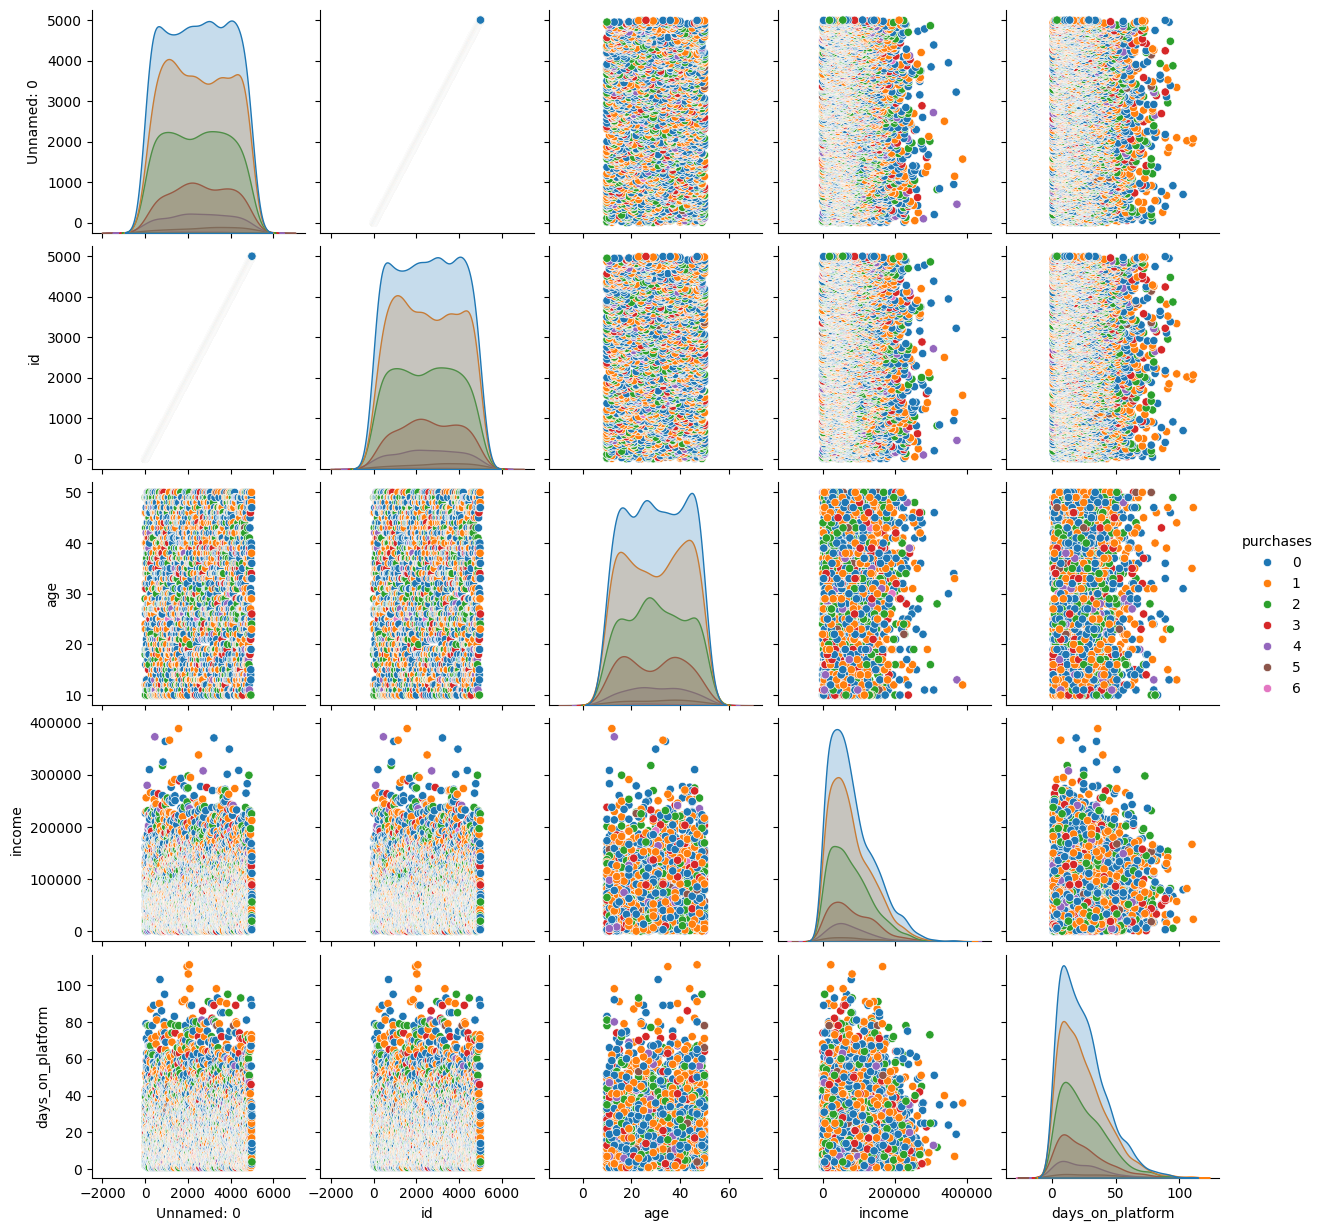

In [13]:
data['purchases'] = data['purchases'].astype('category')
sns.pairplot(data, hue='purchases')
plt.show()



In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Train Decision Tree Classifiers
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)


In [31]:
# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (Gini): {accuracy_gini * 100:.2f}%")
print(f"Accuracy (Entropy): {accuracy_entropy * 100:.2f}%")


Accuracy (Gini): 26.20%
Accuracy (Entropy): 28.00%


In [32]:
# Precision, Recall, and F1-Score
print("\nClassification Report - Gini")
print(classification_report(y_test, y_pred_gini))

print("\nClassification Report - Entropy")
print(classification_report(y_test, y_pred_entropy))


Classification Report - Gini
              precision    recall  f1-score   support

           0       0.35      0.35      0.35       588
           1       0.25      0.26      0.26       446
           2       0.22      0.22      0.22       279
           3       0.07      0.08      0.07       112
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         5

    accuracy                           0.26      1500
   macro avg       0.13      0.13      0.13      1500
weighted avg       0.26      0.26      0.26      1500


Classification Report - Entropy
              precision    recall  f1-score   support

           0       0.38      0.37      0.38       588
           1       0.30      0.30      0.30       446
           2       0.19      0.20      0.19       279
           3       0.09      0.10      0.10       112
           4       0.00      0.00      0.00        51
           5   

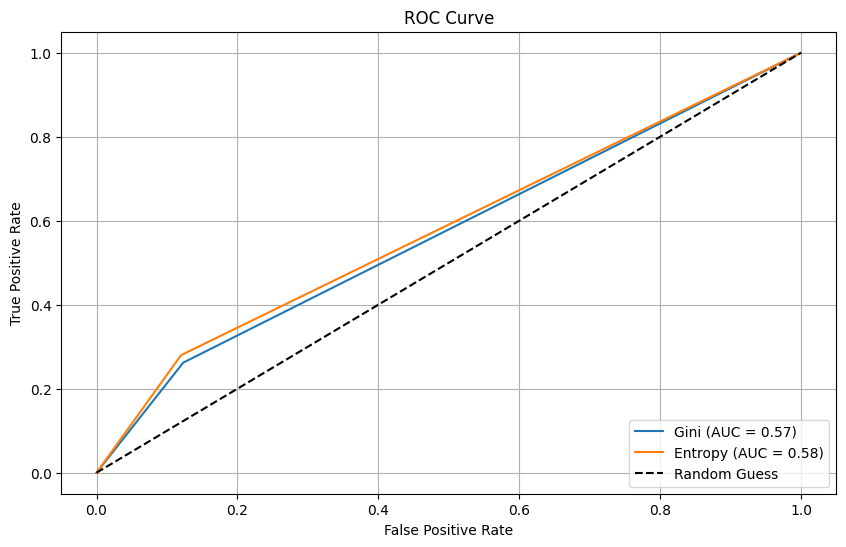

In [37]:
# ROC Curve
from sklearn.preprocessing import label_binarize
# Binarize the target for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_binarized.shape[1]
# Predict probabilities
y_score_gini = clf_gini.predict_proba(X_test)
y_score_entropy = clf_entropy.predict_proba(X_test)
# Compute ROC curve and AUC
fpr_gini, tpr_gini, _ = roc_curve(y_test_binarized.ravel(), y_score_gini.ravel())
fpr_entropy, tpr_entropy, _ = roc_curve(y_test_binarized.ravel(), y_score_entropy.ravel())

roc_auc_gini = auc(fpr_gini, tpr_gini)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)
# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label=f"Gini (AUC = {roc_auc_gini:.2f})")
plt.plot(fpr_entropy, tpr_entropy, label=f"Entropy (AUC = {roc_auc_entropy:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

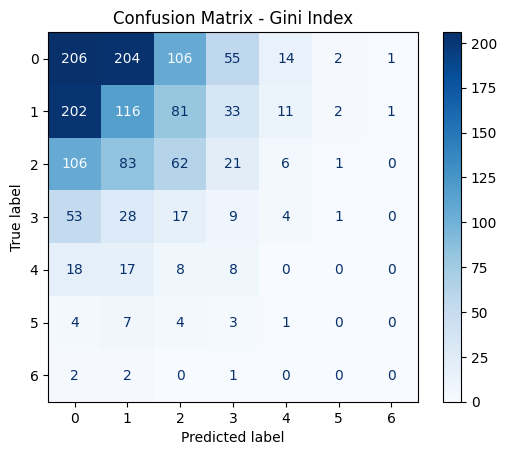

In [39]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Gini Index")
plt.show()



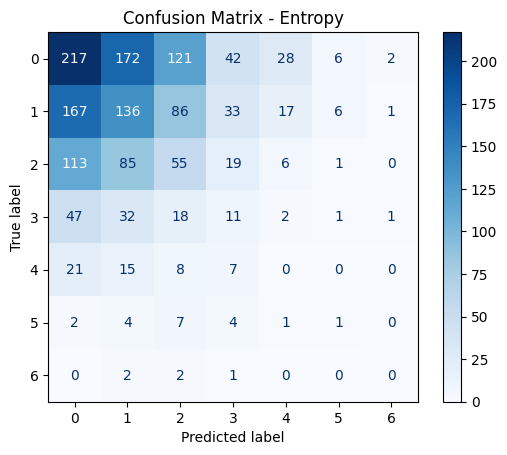

In [40]:
ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Entropy")
plt.show()

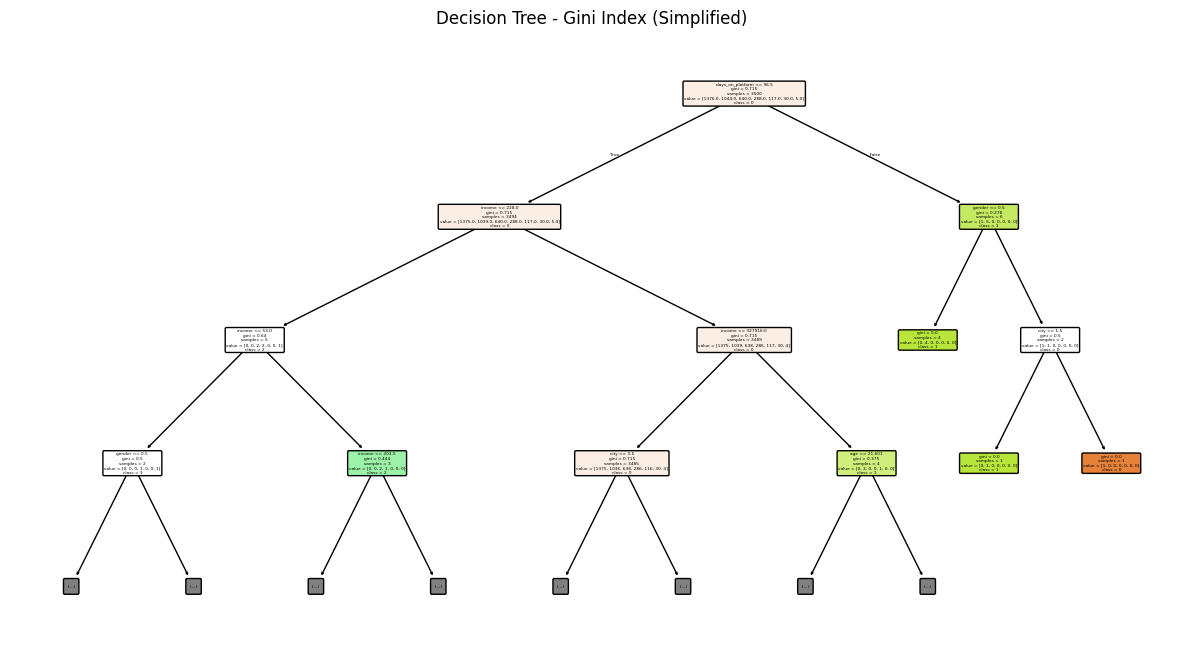

In [42]:
# Decision Tree Visualization (Simplified to Max Depth 3)
plt.figure(figsize=(15, 8))
plot_tree(clf_gini, max_depth=3, feature_names=X.columns, class_names=[str(cls) for cls in sorted(y.unique())], filled=True, rounded=True)
plt.title("Decision Tree - Gini Index (Simplified)")
plt.show()

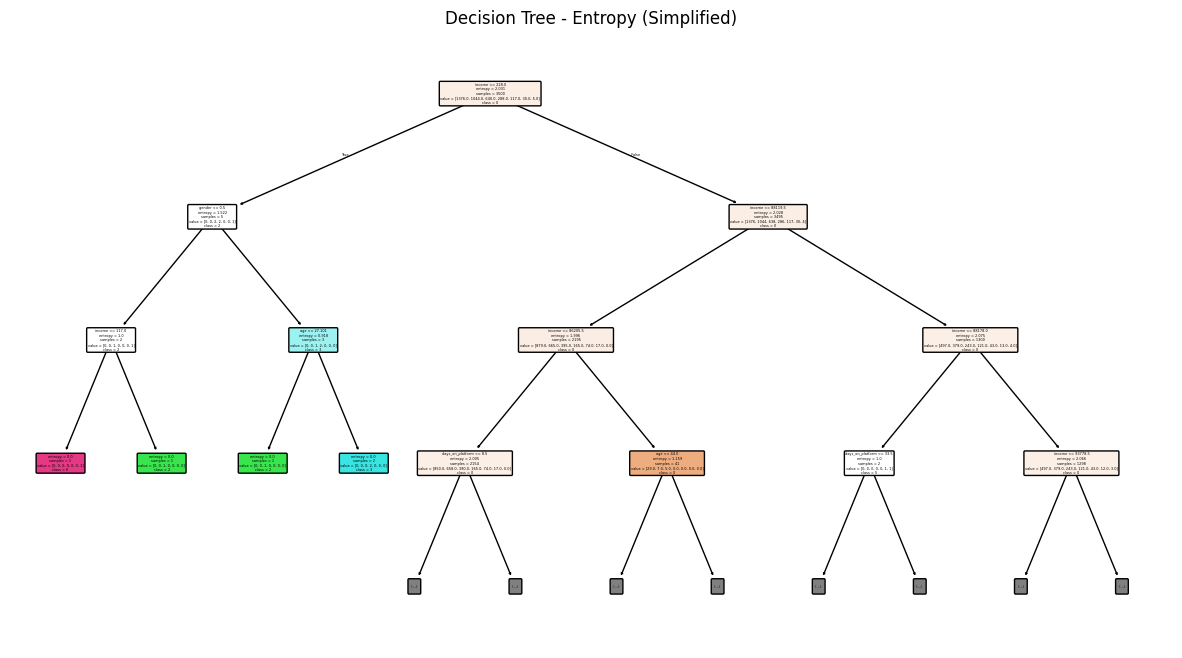

In [43]:
plt.figure(figsize=(15, 8))
plot_tree(clf_entropy, max_depth=3, feature_names=X.columns, class_names=[str(cls) for cls in sorted(y.unique())], filled=True, rounded=True)
plt.title("Decision Tree - Entropy (Simplified)")
plt.show()